<a href="https://colab.research.google.com/github/rachelspringer77/SpringerPython451Final/blob/main/RachelSpringerFinalExam_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import all the necessary packages.  **[2 points]**

In [2]:
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [4]:
from google.colab import files
import io
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['UCI_Credit_Card.csv']))
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Rename the dependent variable:

In [6]:
#renaming the dependent variable
df['IsDefaulter'] =df['default.payment.next.month']
df = df.drop('default.payment.next.month',axis = 1)

#renaming a few other independent variables
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# **EXPLORATORY DATA ANALYSIS**  **[05 points]**

2. What is the size of the dataset? What do the columns tell you? That is, what are the features?

3. Print the summary statistics. On Brightspace, describe your findings (in around 4-5 lines). What trends do you notice? Any anomaly? Does anything stick out as being strange?

In [7]:
df.shape

(30000, 25)

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter'],
      dtype='object')

In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [11]:
#summarystatistics
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 4. How would you deal with **missing values**? HINT: look at the education variable and what each category means in the definitions list that I have provided you with.

##### Explain what you do with missing values. Do you drop them, or ignore them, or impute them with the average, or put them into fewer buckets? Explain your reasoning. **Check** if **other variables** require the same treatment or not.  **[5 points]**

In [17]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Consolidate 'EDUCATION' categories
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 'Other')

# Print the results
print(df['EDUCATION'].value_counts())

EDUCATION
2        14030
1        10585
3         4917
Other      345
4          123
Name: count, dtype: int64


### Similarly, check for **outliers** and deal with them accordingly.

In [23]:
import pandas as pd
import numpy as np

# ... (your existing code to load, prepare, and handle missing values) ...

# 1. Identify Outliers using IQR
def identify_outliers_iqr(data, column):
    """Identifies outliers using the Interquartile Range (IQR) method."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example usage:
outliers_limit_bal = identify_outliers_iqr(df, 'LIMIT_BAL')
print("Outliers in LIMIT_BAL:", outliers_limit_bal)

# 2. Handle Outliers (Choose one or a combination of methods)
# a. Capping/Winsorization:
def cap_outliers(data, column, lower_percentile=1, upper_percentile=99):
    """Caps outliers to a specified percentile range."""
    lower_bound = data[column].quantile(lower_percentile / 100)
    upper_bound = data[column].quantile(upper_percentile / 100)
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    return data

# Example usage:
df = cap_outliers(df, 'LIMIT_BAL')

# b. Transformation (e.g., log transformation):
# df['LIMIT_BAL_log'] = np.log(df['LIMIT_BAL'])  # Apply log transformation

# c. Removal (use with caution!):
# df = df[(df['LIMIT_BAL'] >= lower_bound) & (df['LIMIT_BAL'] <= upper_bound)]

# ... (continue with your data analysis and modeling) ...

Outliers in LIMIT_BAL: Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_SEPT, PAY_AUG, PAY_JUL, PAY_JUN, PAY_MAY, PAY_APR, BILL_AMT_SEPT, BILL_AMT_AUG, BILL_AMT_JUL, BILL_AMT_JUN, BILL_AMT_MAY, BILL_AMT_APR, PAY_AMT_SEPT, PAY_AMT_AUG, PAY_AMT_JUL, PAY_AMT_JUN, PAY_AMT_MAY, PAY_AMT_APR, IsDefaulter]
Index: []

[0 rows x 25 columns]


### 5. What is the **probability of default**?  **[3 points]**

In [27]:
import pandas as pd
import numpy as np
import io
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the actual filename from the uploaded dictionary
uploaded_filename = list(uploaded.keys())[0]

# Read the file into a DataFrame using the actual filename
df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]))

# Calculate the probability of default
probability_of_default = df['default.payment.next.month'].mean()

# Print the result
print(f"The probability of default is: {probability_of_default:.4f}")

Saving UCI_Credit_Card.csv to UCI_Credit_Card (2).csv
The probability of default is: 0.2212


### 6. Create a few charts like count of default, and sex, education, marriage, and age versus default. These can be bar charts, pie charts, whatever you like. You can select other variables as per your liking too.  **[10 points]**

Saving UCI_Credit_Card.csv to UCI_Credit_Card (3).csv


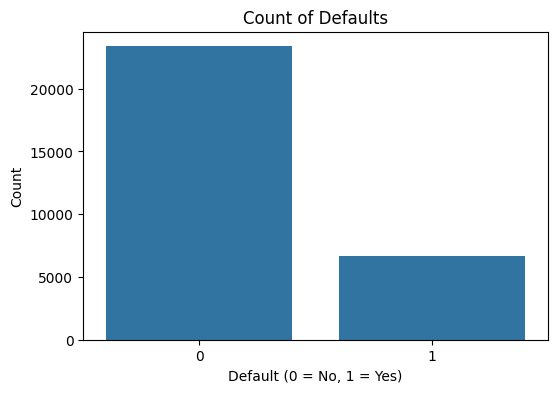

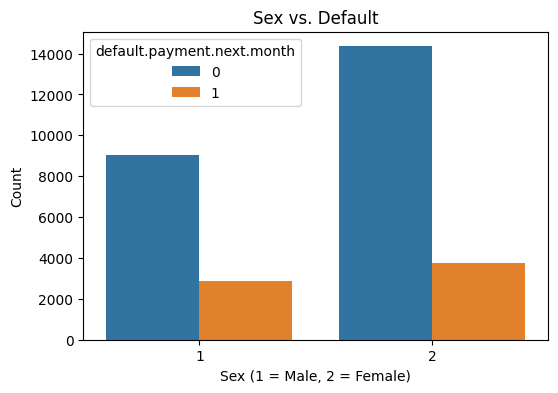

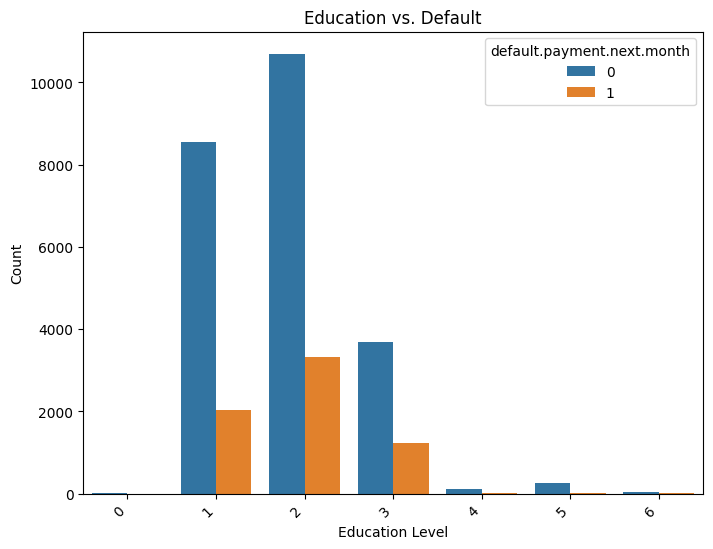

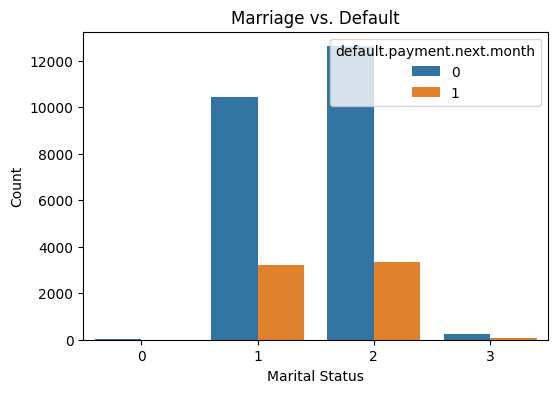

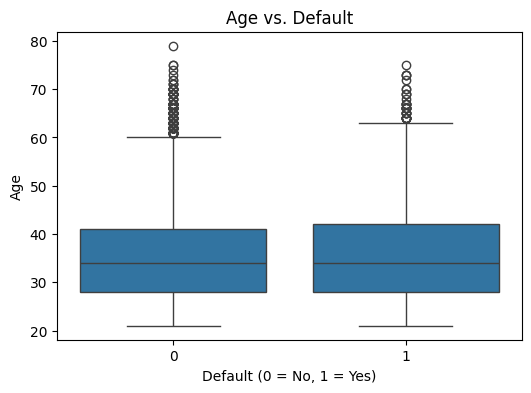

In [28]:
import pandas as pd
import numpy as np
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the file
uploaded = files.upload()

# Get the actual filename from the uploaded dictionary
uploaded_filename = list(uploaded.keys())[0]

# Read the file into a DataFrame using the actual filename
df = pd.read_csv(io.BytesIO(uploaded[uploaded_filename]))

# 1. Count of Defaults (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Count of Defaults')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 2. Sex vs. Default (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', hue='default.payment.next.month', data=df)
plt.title('Sex vs. Default')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.show()

# 3. Education vs. Default (Bar Chart)
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df)
plt.title('Education vs. Default')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# 4. Marriage vs. Default (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=df)
plt.title('Marriage vs. Default')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# 5. Age vs. Default (Box Plot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='default.payment.next.month', y='AGE', data=df)
plt.title('Age vs. Default')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

## I am first goint to balance the imbalanced dataset. Next, I have created a column which is the sum of all payments made by each consumer.

### 7. What is the payment value and dues value of a defaulter versus a non-defaulter, on average? Show me a boxplot and indicate if there is a difference.  **[4 points]**

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
# Instead of using df['IsDefaulter'], use df['default.payment.next.month']
# which is the original column name for the target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default.payment.next.month'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

columns = list(df.columns)
balance_df = pd.DataFrame(x_smote, columns=columns)

# Add the 'IsDefaulter' column to the resampled DataFrame
balance_df['IsDefaulter'] = y_smote

df_fr = balance_df.copy()

# Apply the renaming to df_fr as well
df_fr.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df_fr.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df_fr.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


df_fr['Payment_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

Original dataset shape 30000
Resampled dataset shape 46728


             Payment_Value           Dues
IsDefaulter                              
0                -1.980140  187742.051532
1                 1.658877  193131.008120


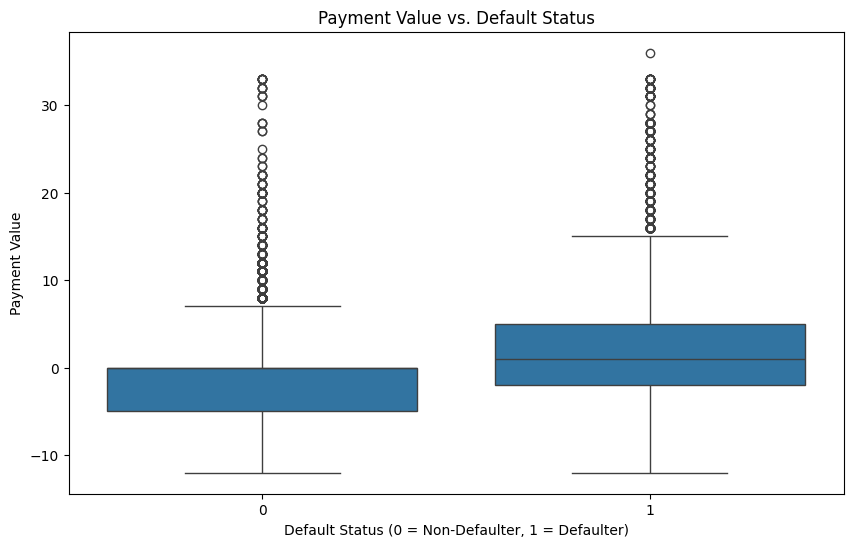

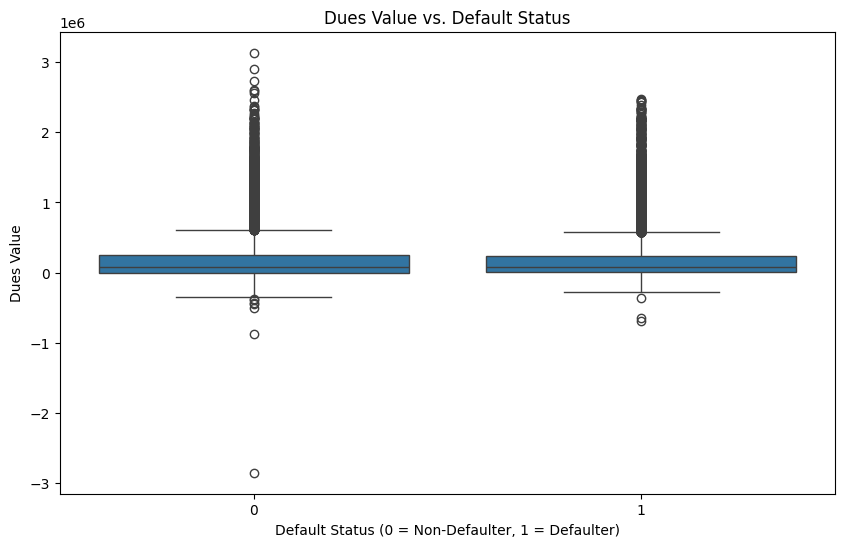

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_fr is your DataFrame with 'Payment_Value', 'Dues', and 'IsDefaulter' columns

# 1. Calculate Average Payment Value and Dues
avg_values = df_fr.groupby('IsDefaulter')[['Payment_Value', 'Dues']].mean()
print(avg_values)

# 2. Create Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsDefaulter', y='Payment_Value', data=df_fr)
plt.title('Payment Value vs. Default Status')
plt.xlabel('Default Status (0 = Non-Defaulter, 1 = Defaulter)')
plt.ylabel('Payment Value')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='IsDefaulter', y='Dues', data=df_fr)
plt.title('Dues Value vs. Default Status')
plt.xlabel('Default Status (0 = Non-Defaulter, 1 = Defaulter)')
plt.ylabel('Dues Value')
plt.show()

# 3. Analyze the Difference
# (Based on the boxplots and average values)
# ...

### 8. Convert your sex, education, and marriage columns to string variables, and then **'one-hot-encode'** them.  **[6 points]**

#### The process for 'sex' shown to you as an example:

In [ ]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_fr = df_fr.replace(encoders_nums)
df_fr.head() # ideally, your table should look like this once you run your code up to this point.

In [50]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}}, inplace = True)
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_fr = df_fr.replace(encoders_nums)
df_fr.head() # ideally, your table should look like this once you run your code up to this point.


<ipython-input-50-140025da5af5>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_fr = df_fr.replace(encoders_nums)


,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,0,24,2,2,-1,-1,-2,-2,...,False,True,False,False,False,False,False,True,False,False
1,2,120000.0,0,26,-1,2,0,0,0,2,...,False,True,False,False,False,False,False,False,True,False
2,3,90000.0,0,34,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
3,4,50000.0,0,37,0,0,0,0,0,0,...,False,True,False,False,False,False,False,True,False,False
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,False,True,False,False,False,False,False,True,False,False


In [51]:
# ... (previous code) ...

# Encoding for 'EDUCATION' column
# Assuming 'EDUCATION' column contains numerical values 1, 2, 3, 4, and 'Other'
df_fr.replace({'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Other'}}, inplace=True)

# One-hot encoding for 'EDUCATION'
# Create a dictionary for mapping education levels to numerical values
encoders_nums_edu = {
    'EDUCATION': {
        'Graduate School': 0,
        'University': 1,
        'High School': 2,
        'Other': 3
    }
}

# Replace education levels with numerical values
df_fr = df_fr.replace(encoders_nums_edu)

df_fr.head()  # Display the DataFrame after encoding 'EDUCATION'

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,0,24,2,2,-1,-1,-2,-2,...,False,True,False,False,False,False,False,True,False,False
1,2,120000.0,0,26,-1,2,0,0,0,2,...,False,True,False,False,False,False,False,False,True,False
2,3,90000.0,0,34,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
3,4,50000.0,0,37,0,0,0,0,0,0,...,False,True,False,False,False,False,False,True,False,False
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,False,True,False,False,False,False,False,True,False,False


In [52]:
# ... (previous code) ...

# Encoding for 'MARRIAGE' column
# Assuming 'MARRIAGE' column contains numerical values 1, 2, 3, and 'Other'
df_fr.replace({'MARRIAGE': {1: 'Married', 2: 'Single', 3: 'Other'}}, inplace=True)

# One-hot encoding for 'MARRIAGE'
# Create a dictionary for mapping marriage status to numerical values
encoders_nums_marriage = {
    'MARRIAGE': {
        'Married': 0,
        'Single': 1,
        'Other': 2
    }
}

# Replace marriage status with numerical values
df_fr = df_fr.replace(encoders_nums_marriage)

df_fr.head()  # Display the DataFrame after encoding 'MARRIAGE'

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,0,24,2,2,-1,-1,-2,-2,...,False,True,False,False,False,False,False,True,False,False
1,2,120000.0,0,26,-1,2,0,0,0,2,...,False,True,False,False,False,False,False,False,True,False
2,3,90000.0,0,34,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,True,False
3,4,50000.0,0,37,0,0,0,0,0,0,...,False,True,False,False,False,False,False,True,False,False
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,False,True,False,False,False,False,False,True,False,False


### 9. Now, ML.  **[5 points]**

First, Standardize your data, shuffle it, and divide it into the train-test-split samples. Choose a split of your choice.

In [53]:
!pip install -q imblearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # Import SMOTE
import warnings


warnings.filterwarnings("ignore")

X = df_fr.drop('IsDefaulter', axis=1)  # Features
y = df_fr['IsDefaulter']  # Target

# 2. Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Shuffle and Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=True
)

print("Data shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Data shapes:
X_train: (37382, 36)
X_test: (9346, 36)
y_train: (37382,)
y_test: (9346,)


### 9a. Logistic Regression. **[10 points]**
  - run logistic regression.
  - calculate accuracy.
  - print the confusion matrix.
  - plot feature importance.
  - get the classification report.
  - plot the ROC-AUC curve.

Accuracy: 0.7475
Confusion Matrix:
[[3428 1236]
 [1124 3558]]


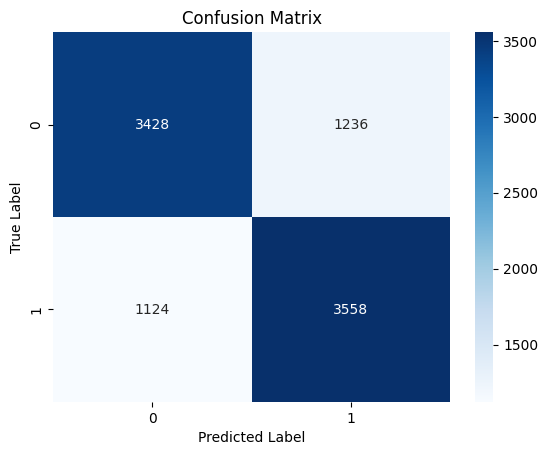

In [57]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, y_test from the previous step

# 1. Create and Train Decision Tree Model
model = DecisionTreeClassifier(random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# 2. Predict and Evaluate
y_pred = model.predict(X_test)  # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Repeat the above steps with all the supervised ML techniques that you are familiar with:

#### 9b. Decision Tree                        **[10 points]**
#### 9c. Random Forest                        **[10 points]**
#### 9d. K-Nearest Neighbors                  **[10 points]**
#### 9e. Support Vector Machine (NEW method)  **[10 points]**

Accuracy: 0.7475
Confusion Matrix:
[[3428 1236]
 [1124 3558]]


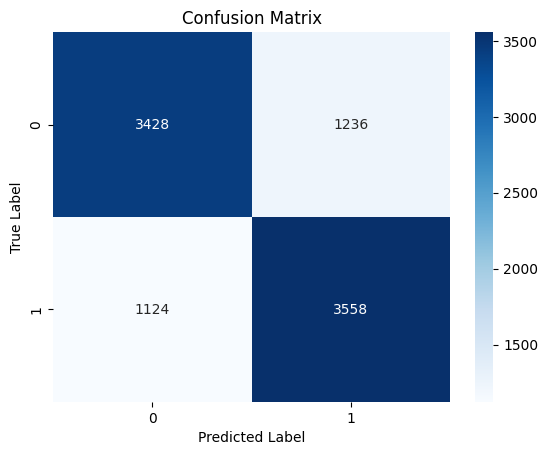

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      4664
           1       0.74      0.76      0.75      4682

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



In [62]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, y_test from the previous step

# 1. Create and Train Decision Tree Model
model = DecisionTreeClassifier(random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# 2. Predict and Evaluate
y_pred = model.predict(X_test)  # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 5. Feature Importance (Optional)
# If you want to see feature importance:
# importances = model.feature_importances_
# # ... (code to visualize feature importances) ...

Accuracy: 0.8383
Confusion Matrix:
[[4009  655]
 [ 856 3826]]


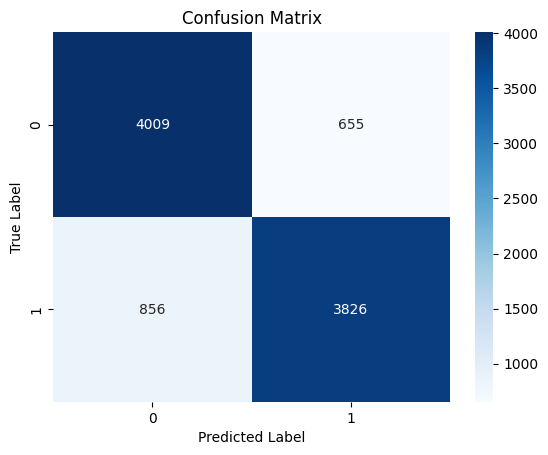

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4664
           1       0.85      0.82      0.84      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have X_train, X_test, y_train, y_test from the previous step

# 1. Create and Train Random Forest Model
model = RandomForestClassifier(random_state=42)  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# 2. Predict and Evaluate
y_pred = model.predict(X_test)  # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 5. Feature Importance (Optional)
# If you want to see feature importance:
# importances = model.feature_importances_
# # ... (code to visualize feature importances) ...

Accuracy: 0.7556
Confusion Matrix:
[[3423 1241]
 [1043 3639]]


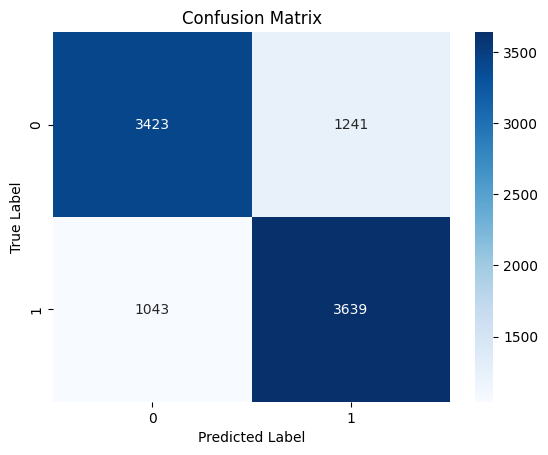

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      4664
           1       0.75      0.78      0.76      4682

    accuracy                           0.76      9346
   macro avg       0.76      0.76      0.76      9346
weighted avg       0.76      0.76      0.76      9346



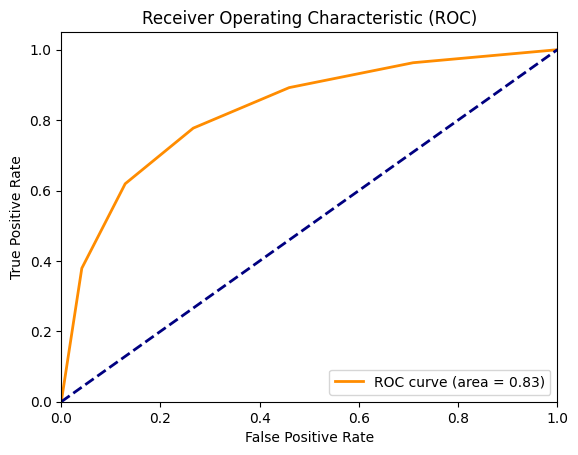

In [63]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer # import SimpleImputer

# Assuming you have X_train, X_test, y_train, y_test from the previous step

# 1. Create and Train KNN Model
model = KNeighborsClassifier(n_neighbors=5)  # Initialize with k=5 (you can adjust)

# Impute missing values using SimpleImputer before training
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of the column
X_train = imputer.fit_transform(X_train)  # Fit and transform on training data
X_test = imputer.transform(X_test)  # Transform test data using the fitted imputer

model.fit(X_train, y_train)  # Train the model

# 2. Predict and Evaluate
y_pred = model.predict(X_test)  # Predict on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Print Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 5. ROC-AUC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 6. Feature Importance (KNN doesn't have built-in feature importance)
# You can use techniques like permutation importance for feature importance with KNN